<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

## *Data Science Unit 4 Sprint 2*

# Sprint Challenge - Neural Network Foundations

Table of Problems

1. [Defining Neural Networks](#Q1)
2. [Simple Perceptron](#Q2)
    - Perceptron
    - Multilayer Perceptron
    - Analyze and Compare
4. [Keras MMP](#Q3)

<a id="Q1"></a>
## 1. Defining Neural Networks 

Write *your own* definitions for the following terms:

- **Neuron:** A neuron is a node where data is processed. As a neural network trains a neuron retains a specific formula or search parameter that the data is passed through. An example of this would be in an image recognition neural network a specific neuron is tasked with looking at a specific region of the image for some kind of information, be it a color or contrast or if the pixels are even used or whatnot. That information is then passed on to the next layer.
- **Input Layer:** The input layer is where the data is initially entered into the neural network. The size of this layer depends upon how much information is being used. In the above example of a neuron for image processing, the input layer would need an entry for each pixel of the image being processed. 
- **Hidden Layer:** Hidden layers are the underlying layers of a neural network where the work is actully done. These layers are filled with a certain number of neurons the process the data and pass it to the next layer. An ideal way to think about this process, but not always (or maybe even often) the case in the real world, would be that one layer looks for information in a specific region of an image. Another layer then looks for shapes based on the information passed to it.
- **Output Layer:** The output layer is where a decision is made and reported. For the image processing example I've been using, let's say we wanted to check for specific digits in images. There are 10 digits to choose from. Based on the work done by the hidden layers information is passed to the output layer which then assigns probabilities to each of the possible digits. As the network runs and is trained hopefully this prediction gets narrowed down to reporting mostly only a single digit.
- **Activation Function:** The activation function choice in a given layer of the neural network is what determines whether each neuron passes on information to the next layer or not. Back to the image processing example.... One given neuron might look for pixels being used in the top left corner of the image. If there aren't any then the activation function doesn't, well, activate; the neuron doesn't pass any information. Another neuron looking for pixels in the image finds some and the activation function has the neuron determine a value, perhaps the percentage of used pixels in its region, which then gets passed to the next layer.

#### Explain how back propagation works as if you were explaining it to a five year-old. Use your own words, but feel free to reference external materials for this question. 

Back propagation is a means of checking the neural network process for error and passing that error back through the network to make corrections in hopes of making the network work better by fixing where the worst problems are occuring. Here's a simple, relatable example for a five year-old, though not perfect in comparison.

We're building an awesome track for us to send Hot Wheels cars down. First, we lay out the track where we want it to go with all the funs things involved with that. We know where we want it to end up so we have an idea of what should happen. So, we let a car run down the track but it doesn't end up where we expect. We walk along the track to find where the car ended up and see that the track wasn't connected there. This is our loss function identifying the problem and now we fix that by connecting the track. We pick up the car and let it run again but it still doesn't get where we thought it would. We walk along the track, find the problem (a twisted track this time), fix it, and then run the car again. We keep doing this and each time we fix the problem and the track runs the car better until we get what we needed: a fun time and the car at the end of the track. Us fixing the track each time where it's not working based on our analysis as we walked along it is back-propagation.

#### Remember our Simple Perceptron Class from Monday. In a simple prediction describe the process of making a prediction. How do you go from inputs to predicted output.

A simple (single layer) perceptron has no hidden layers. This means that there can't be any work done to help narrow results before passing information to the output layer and making a prediction. In this case, the information is presented in the input layer and passed directly to the output layer. Ok, how would this work? Imagine a set of data scattered about between two classes, say reds and blues. Our simple perceptron takes in this data and tries to draw a straight line that best separates the two classes; it can move the y-intercept of the line up and down and it can change the slope all it wants. Depending on how the two classes are separated this might work great. But if there is a mix of reds and blues or they are clustered in more than two clustered it might not work out well. If we could add more layers to the perceptron and get a robust neural network then we could better handle the mixing and clustering. But the simple perceptron from Monday can't.

<a id="Q2"></a>
## 2. Simple Perceptron

In this question, you will build two neural networks using Tensorflow Keras. After you build these two models, compare the results of the model.

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
"""
Our Dataset
"""
import numpy as np

xx, yy = np.meshgrid(np.linspace(-3, 3, 50),
                     np.linspace(-3, 3, 50))
rng = np.random.RandomState(0)

"Use this X & y in the following 2 models"
X = rng.randn(300, 2)
y = np.array(np.logical_xor(X[:, 0] > 0, X[:, 1] > 0), 
             dtype=int)

In [3]:
X.shape, y.shape

((300, 2), (300,))

### Simple Perceptron
Construct a simple perceptron using Keras. You model should have 1 dense layer with a single neuron and a sigmoid activation function. Your model should be called `model1` and make sure to save the results of your fit statement to a variable called `h1`. 

In [4]:
# Create the model
model1 = Sequential()
model1.add(Dense(1, input_dim=2, activation='sigmoid'))
model1.add(Dense(1, activation='sigmoid'))

# Compile the Model
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h1 = model1.fit(X, y, epochs=10)

Train on 300 samples
Epoch 1/10
300/300 [==============================] - 0s 735us/sample - loss: 0.6967 - accuracy: 0.4733
Epoch 2/10
300/300 [==============================] - 0s 69us/sample - loss: 0.6962 - accuracy: 0.4733
Epoch 3/10
300/300 [==============================] - 0s 33us/sample - loss: 0.6959 - accuracy: 0.4733
Epoch 4/10
300/300 [==============================] - 0s 30us/sample - loss: 0.6956 - accuracy: 0.4733
Epoch 5/10
300/300 [==============================] - 0s 37us/sample - loss: 0.6953 - accuracy: 0.4733
Epoch 6/10
300/300 [==============================] - 0s 37us/sample - loss: 0.6951 - accuracy: 0.4667
Epoch 7/10
300/300 [==============================] - 0s 30us/sample - loss: 0.6948 - accuracy: 0.4467
Epoch 8/10
300/300 [==============================] - 0s 34us/sample - loss: 0.6946 - accuracy: 0.4367
Epoch 9/10
300/300 [==============================] - 0s 0s/sample - loss: 0.6945 - accuracy: 0.4333
Epoch 10/10
300/300 [==============================] 

### Multi-Layer Perceptron
Now construct a multi-layer perceptron using. Here are some architecture suggestions: 
- 2 Hidden Layers
- 5-32 Neurons in the Hidden Layers
- Your pick of activation function and optimizer
- Incorporate the Callback function below into your model

Your model should be called `model2` and make sure to save the results of your fit statement to a variable called `h2`. 

In [5]:
import tensorflow as tf

class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('accuracy') > .99999):   
            self.model.stop_training = True

In [9]:
# Create the model
model2 = Sequential()
model2.add(Dense(24, input_dim=2, activation='relu'))
model2.add(Dense(24, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the Model
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
h2 = model2.fit(X, y, epochs=10, callbacks=[myCallback()])

Train on 300 samples
Epoch 1/10
300/300 [==============================] - 0s 736us/sample - loss: 0.7425 - accuracy: 0.3500
Epoch 2/10
300/300 [==============================] - 0s 43us/sample - loss: 0.7160 - accuracy: 0.4733
Epoch 3/10
300/300 [==============================] - 0s 40us/sample - loss: 0.6915 - accuracy: 0.5833
Epoch 4/10
300/300 [==============================] - 0s 34us/sample - loss: 0.6677 - accuracy: 0.6967
Epoch 5/10
300/300 [==============================] - 0s 0s/sample - loss: 0.6466 - accuracy: 0.7333
Epoch 6/10
300/300 [==============================] - 0s 72us/sample - loss: 0.6267 - accuracy: 0.7367
Epoch 7/10
300/300 [==============================] - 0s 33us/sample - loss: 0.6073 - accuracy: 0.7600
Epoch 8/10
300/300 [==============================] - 0s 38us/sample - loss: 0.5878 - accuracy: 0.7967
Epoch 9/10
300/300 [==============================] - 0s 38us/sample - loss: 0.5682 - accuracy: 0.8167
Epoch 10/10
300/300 [==============================] 

### Analyze and Compare

**Before you Start**: You will need to install an additional library for this next segment. Install the package `mlxtend` into the environment you are using for the sprint challenge.


The cells below generate decision boundary plots of your models (`model1` & `model2`). Review the plots.

In [10]:
! pip install --user mlxtend

C:\Users\Neal\AppData\Roaming\Python\Python37\site-packages\mlxtend\plotting\decision_regions.py:249: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


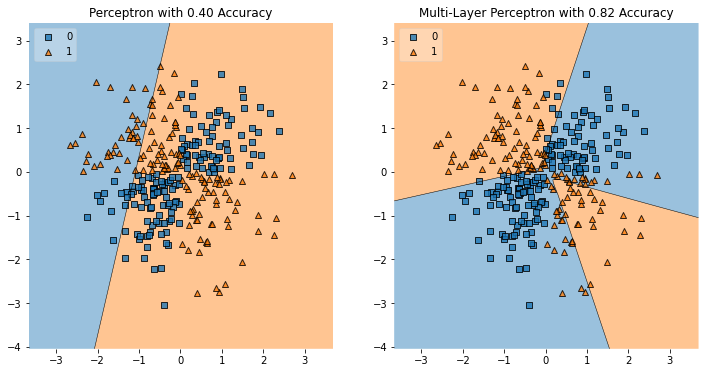

In [11]:
# Do Not change anything in this cell

import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

h = .02  # step size in the mesh

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig = plt.figure(figsize=(12,6))


for clf, hist, name, grd in zip([model1,model2], [h1, h2],['Perceptron', 'Multi-Layer Perceptron'],[1,2]):

    ax = plt.subplot(1,2, grd)
    fig = plot_decision_regions(X=X, y=y, clf=clf, legend=2)
    title = f"{name} with {hist.history['accuracy'][-1]:,.2f} Accuracy"
    plt.title(title)

plt.show()

Why does the Perceptron (`model1`) only achieve ~70% accuracy? What is the architectural property of the Multi-Layer Perceptron that allows it more accurately learn the relationship between X and y? 

Why might this property be useful in more complex data such as images?

-----------------------------
Model 1 getting ~70% accuracy??? Mine is WAY below that and I'd be amazed if someone did get close to that. I'm assuming that is a type for the specific reason that model1 can only create a single line to divide the two different classes of data. In the plots above, model1 is trying to separate the squares from the triangles with ONE line. But that's not possible so it tries to do the best it can. In my case, since I didn't train it enough it actually got a little worse as it ran. But for model2, the multiple hidden layers allow the model to think in more terms than just one line which allows it to actually look at clusters. Since the dataset i clearly clustered it does a decent job. If I let it train a bit more (increase the epochs) or used a better model (add layers) it would likely do even better. 

This idea of adding layers is useful for the reasons I've already stated above in my definitions and implied here: each layer can work on a task to pass to the next layer that refines the data. If you don't have layers to do this then it's just a best of fitting a line and not everything (and especially not images) can be expressed in linear regression. You need layers to look for patterns and shapes and then to put those patterns and shapes together before finally saying, "Hey! I'm pretty sure that's a dog."

## 3. Keras MMP <a id="Q3"></a>

Implement a Multilayer Perceptron architecture of your choosing using the Keras library. Train your model and report its baseline accuracy. Then hyperparameter tune at least two parameters and report your model's accuracy.
Use the Heart Disease Dataset (binary classification)
Use an appropriate loss function for a binary classification task
Use an appropriate activation function on the final layer of your network.
Train your model using verbose output for ease of grading.
Use GridSearchCV or RandomSearchCV to hyperparameter tune your model. (for at least two hyperparameters)
When hyperparameter tuning, show you work by adding code cells for each new experiment.
Report the accuracy for each combination of hyperparameters as you test them so that we can easily see which resulted in the highest accuracy.
You must hyperparameter tune at least 3 parameters in order to get a 3 on this section.

In [12]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/heart.csv')
df = df.sample(frac=1)
print(df.shape)
df.head()

(303, 14)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2,1
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3,0
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2,1
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3,0


In [13]:
# Get the input data
X = df[df.columns[:13]]
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
88,54,0,2,110,214,0,1,158,0,1.6,1,0,2
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
44,39,1,2,140,321,0,0,182,0,0.0,2,0,2
259,38,1,3,120,231,0,1,182,1,3.8,1,0,3


In [14]:
# Convert to numpy array
X = X.to_numpy()
X.shape, type(X)

((303, 13), numpy.ndarray)

In [17]:
# Normalize all of X
from tensorflow.keras.utils import normalize

X = normalize(X)
X

array([[0.18436525, 0.        , 0.00682834, ..., 0.00341417, 0.        ,
        0.00682834],
       [0.22754361, 0.        , 0.        , ..., 0.0036118 , 0.        ,
        0.00722361],
       [0.18533262, 0.00325145, 0.0065029 , ..., 0.00325145, 0.00325145,
        0.00975435],
       ...,
       [0.16996026, 0.00314741, 0.        , ..., 0.00314741, 0.00314741,
        0.00944224],
       [0.19635854, 0.00344489, 0.00688977, ..., 0.00688977, 0.        ,
        0.00688977],
       [0.21132707, 0.00301896, 0.00301896, ..., 0.00603792, 0.        ,
        0.00603792]])

In [18]:
# Get the target column
y = df[df.columns[13:]]
y.head()

,target
88,1
296,0
210,0
44,1
259,0


In [19]:
# Convert to numpy array
y = y.to_numpy()
y.shape, type(y)

((303, 1), numpy.ndarray)

## Now, the model!

### Baseline

In [22]:
# Create the model
model = Sequential()
model.add(Dense(20, input_dim=13, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

# Compile the Model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
model.fit(X, y,
          epochs=10)

Train on 303 samples
Epoch 1/10
303/303 [==============================] - 0s 665us/sample - loss: 0.7653 - accuracy: 0.4554
Epoch 2/10
303/303 [==============================] - 0s 33us/sample - loss: 0.7435 - accuracy: 0.4554
Epoch 3/10
303/303 [==============================] - 0s 36us/sample - loss: 0.7259 - accuracy: 0.4554
Epoch 4/10
303/303 [==============================] - 0s 39us/sample - loss: 0.7134 - accuracy: 0.4554
Epoch 5/10
303/303 [==============================] - 0s 40us/sample - loss: 0.7033 - accuracy: 0.4554
Epoch 6/10
303/303 [==============================] - 0s 40us/sample - loss: 0.6984 - accuracy: 0.4554
Epoch 7/10
303/303 [==============================] - 0s 34us/sample - loss: 0.6938 - accuracy: 0.4785
Epoch 8/10
303/303 [==============================] - 0s 43us/sample - loss: 0.6916 - accuracy: 0.5446
Epoch 9/10
303/303 [==============================] - 0s 43us/sample - loss: 0.6909 - accuracy: 0.5446
Epoch 10/10
303/303 [==============================

### Baseline Accuracy: 54%

## Hyperparamer Tuning

### Start with batch size

In [23]:
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

In [27]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, verbose=0)

param_grid = {'batch_size': [10, 20, 40, 60, 80, 100],
              'epochs': [20]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.6s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    2.0s
[Parallel(n_jobs=6)]: Done  23 out of  30 | elapsed:    2.8s remaining:    0.8s
[Parallel(n_jobs=6)]: Done  27 out of  30 | elapsed:    3.2s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    3.3s finished


Best: 0.5778688430786133 using {'batch_size': 60, 'epochs': 20}
Means: 0.5516393423080445, Stdev: 0.06874916235933248 with: {'batch_size': 10, 'epochs': 20}
Means: 0.571639335155487, Stdev: 0.09448565257600627 with: {'batch_size': 20, 'epochs': 20}
Means: 0.5516393423080445, Stdev: 0.0778445945256429 with: {'batch_size': 40, 'epochs': 20}
Means: 0.5778688430786133, Stdev: 0.04194643703625284 with: {'batch_size': 60, 'epochs': 20}
Means: 0.5449726819992066, Stdev: 0.06176546522847217 with: {'batch_size': 80, 'epochs': 20}
Means: 0.5449726819992066, Stdev: 0.06176546522847217 with: {'batch_size': 100, 'epochs': 20}


### Batch size of 60 does the best at 57.8%. Update that and try epochs.

In [28]:
# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, verbose=0)

param_grid = {'epochs': [10, 20, 30, 40, 60, 80, 100]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    1.7s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    2.5s
[Parallel(n_jobs=6)]: Done  28 out of  35 | elapsed:    3.7s remaining:    0.9s
[Parallel(n_jobs=6)]: Done  32 out of  35 | elapsed:    4.6s remaining:    0.3s
[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed:    4.8s finished


Best: 0.5815300405025482 using {'epochs': 100}
Means: 0.4583060085773468, Stdev: 0.0640244071292041 with: {'epochs': 10}
Means: 0.5516393423080445, Stdev: 0.06874916235933248 with: {'epochs': 20}
Means: 0.5714754104614258, Stdev: 0.07944171236936405 with: {'epochs': 30}
Means: 0.578306007385254, Stdev: 0.10184473193824446 with: {'epochs': 40}
Means: 0.554808747768402, Stdev: 0.060774168632055016 with: {'epochs': 60}
Means: 0.5813114762306213, Stdev: 0.07877586931134783 with: {'epochs': 80}
Means: 0.5815300405025482, Stdev: 0.08842815785850758 with: {'epochs': 100}


### 100 epochs does the best at 58.2%. Update that and try different optimizers.

In [31]:
# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(20, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, epochs=100, verbose=0)

param_grid = {'optimizer': ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    0.9s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.0s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done  28 out of  35 | elapsed:    5.3s remaining:    1.2s
[Parallel(n_jobs=6)]: Done  32 out of  35 | elapsed:    6.3s remaining:    0.5s
[Parallel(n_jobs=6)]: Done  35 out of  35 | elapsed:    6.6s finished


Best: 0.571639335155487 using {'optimizer': 'Nadam'}
Means: 0.5449726819992066, Stdev: 0.06176546522847217 with: {'optimizer': 'SGD'}
Means: 0.5682513594627381, Stdev: 0.08673774877464369 with: {'optimizer': 'RMSprop'}
Means: 0.5378142058849334, Stdev: 0.10280497455923845 with: {'optimizer': 'Adagrad'}
Means: 0.5416939854621887, Stdev: 0.06232278848069726 with: {'optimizer': 'Adadelta'}
Means: 0.5647540926933289, Stdev: 0.06700709936766565 with: {'optimizer': 'Adam'}
Means: 0.5349726796150207, Stdev: 0.05273606632529555 with: {'optimizer': 'Adamax'}
Means: 0.571639335155487, Stdev: 0.09448565257600627 with: {'optimizer': 'Nadam'}


### Slight decrease overall but 'Nadam' was the best at 57.2%. Update that and try learning rate.

In [33]:
from tensorflow.keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.001):
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = Nadam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, epochs=100, verbose=0)

param_grid = {'learn_rate': [.001, .01, .1, .2, .3, .5]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.5s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    4.0s
[Parallel(n_jobs=6)]: Done  23 out of  30 | elapsed:    5.6s remaining:    1.6s
[Parallel(n_jobs=6)]: Done  27 out of  30 | elapsed:    6.7s remaining:    0.7s
[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    7.1s finished


Best: 0.7035519123077393 using {'learn_rate': 0.01}
Means: 0.673606562614441, Stdev: 0.07830654413159654 with: {'learn_rate': 0.001}
Means: 0.7035519123077393, Stdev: 0.09212148282923084 with: {'learn_rate': 0.01}
Means: 0.574972677230835, Stdev: 0.10824329274203592 with: {'learn_rate': 0.1}
Means: 0.5580874383449554, Stdev: 0.04963229413144013 with: {'learn_rate': 0.2}
Means: 0.49830601215362547, Stdev: 0.07638484945503064 with: {'learn_rate': 0.3}
Means: 0.49830601215362547, Stdev: 0.07638484945503064 with: {'learn_rate': 0.5}


### That's a much better accuracy. Let's try fine-tuning the learning rate around 0.01.

In [34]:
from tensorflow.keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(learn_rate=0.001):
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = Nadam(lr=learn_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, epochs=100, verbose=0)

param_grid = {'learn_rate': [.005, .008, .01, .012, .015]}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done  17 out of  25 | elapsed:    4.1s remaining:    1.9s
[Parallel(n_jobs=6)]: Done  20 out of  25 | elapsed:    5.2s remaining:    1.2s
[Parallel(n_jobs=6)]: Done  23 out of  25 | elapsed:    5.4s remaining:    0.4s
[Parallel(n_jobs=6)]: Done  25 out of  25 | elapsed:    6.1s finished


Best: 0.7591803193092346 using {'learn_rate': 0.008}
Means: 0.7193989157676697, Stdev: 0.09177952747492356 with: {'learn_rate': 0.005}
Means: 0.7591803193092346, Stdev: 0.09188938056960816 with: {'learn_rate': 0.008}
Means: 0.6608196496963501, Stdev: 0.10097461771382178 with: {'learn_rate': 0.01}
Means: 0.726338791847229, Stdev: 0.09288566954190677 with: {'learn_rate': 0.012}
Means: 0.7158469915390014, Stdev: 0.13545962239036477 with: {'learn_rate': 0.015}


### Learning rate of 0.008 for the win with 75.9% accuracy!

In [35]:
from tensorflow.keras.optimizers import Nadam

# Function to create model, required for KerasClassifier
def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(128, input_dim=13, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    optimizer = Nadam(lr=0.008)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# create model
model = KerasClassifier(build_fn=create_model, batch_size=60, epochs=100, verbose=0)

param_grid = {'init_mode': ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']}

# Create Grid Search
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=6, verbose=10)
grid_result = grid.fit(X, y)

# Report Results
print(f"Best: {grid_result.best_score_} using {grid_result.best_params_}")
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f"Means: {mean}, Stdev: {stdev} with: {param}")

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done   1 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done   6 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done  13 tasks      | elapsed:    3.8s
[Parallel(n_jobs=6)]: Done  20 tasks      | elapsed:    5.2s
[Parallel(n_jobs=6)]: Done  29 tasks      | elapsed:    6.8s
[Parallel(n_jobs=6)]: Done  34 out of  40 | elapsed:    8.3s remaining:    1.4s
[Parallel(n_jobs=6)]: Done  40 out of  40 | elapsed:    9.4s finished


Best: 0.7524590134620667 using {'init_mode': 'glorot_normal'}
Means: 0.6830054521560669, Stdev: 0.07830440108300177 with: {'init_mode': 'uniform'}
Means: 0.7227868795394897, Stdev: 0.02613918636658556 with: {'init_mode': 'lecun_uniform'}
Means: 0.6860109210014343, Stdev: 0.08797344582885033 with: {'init_mode': 'normal'}
Means: 0.5449726819992066, Stdev: 0.06176546522847217 with: {'init_mode': 'zero'}
Means: 0.7524590134620667, Stdev: 0.05219193825031612 with: {'init_mode': 'glorot_normal'}
Means: 0.7089070916175843, Stdev: 0.119451295394712 with: {'init_mode': 'glorot_uniform'}
Means: 0.702677595615387, Stdev: 0.12562631051393772 with: {'init_mode': 'he_normal'}
Means: 0.6897814273834229, Stdev: 0.06245057826432485 with: {'init_mode': 'he_uniform'}


### glorot_normal has the best accuracy score at 75.2%

## Ok, that's enough for now. All told, through hyperparameter tuning we ended up on the following:

##  Batch Size: 60
##  Epochs: 100
##  Optimizer: nadam
## * Learning Rate: 0.008
## * Weight Initialization: glorot_normal